<a href="https://colab.research.google.com/github/Nikshitha987/SemanticSegmentation/blob/main/Semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install -q torch torchvision matplotlib opencv-python ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


In [2]:
import torch
import torchvision
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display


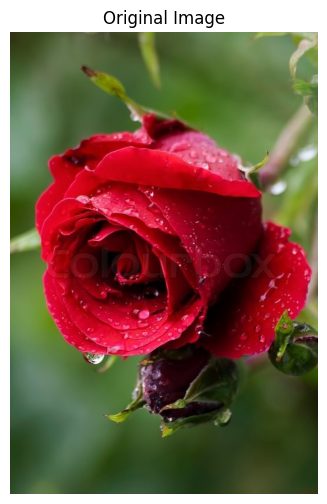

In [4]:
# Function to load an image
def load_image(path):
    img = Image.open(path).convert("RGB")
    return img

# Example usage:
# Upload your image to Colab first (use the left-side file upload)
# For example, if your image is uploaded as 'example.jpg':
img_path = '/content/example.jpg'  # change this to your uploaded file
img = load_image(img_path)

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()


In [6]:
# Load pre-trained DeepLabV3 segmentation model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seg_model = deeplabv3_resnet101(pretrained=True).to(device)
seg_model.eval()

# Function to segment image
def segment_image(img):
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = seg_model(input_tensor)['out'][0]
    masks = output.argmax(0).cpu().numpy()
    return masks

# Example usage
masks = segment_image(img)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


100%|██████████| 233M/233M [00:04<00:00, 54.1MB/s]


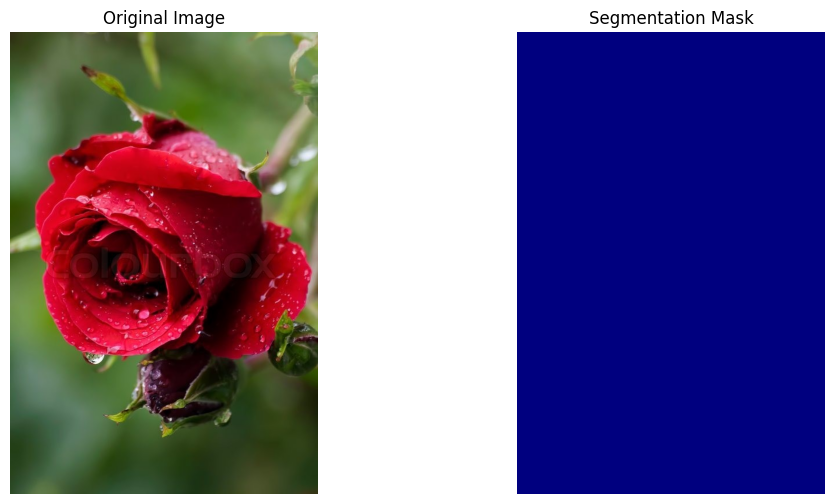

In [7]:
def show_masks(masks, img):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(masks, cmap='jet')
    plt.title("Segmentation Mask")
    plt.axis('off')
    plt.show()

# Show segmentation result
show_masks(masks, img)


In [8]:
def colorize_region(img, mask, target_class):
    # Convert image to Lab color space
    img_lab = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2LAB)
    L = img_lab[:,:,0]

    # Placeholder color (a*b channels)
    colorized_ab = np.zeros_like(img_lab[:,:,1:], dtype=np.uint8)
    colorized_ab[mask==target_class] = [128, 128]  # Add fake color to selected region

    # Merge L channel with colored ab channels
    img_lab[:,:,1:] = colorized_ab
    colorized_img = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)
    return colorized_img


In [9]:
def interactive_colorize(img_path):
    img = load_image(img_path)
    masks = segment_image(img)
    unique_classes = np.unique(masks)

    # Dropdown to select region
    class_selector = widgets.Dropdown(
        options=[(f'Class {i}', i) for i in unique_classes],
        description='Region:'
    )

    # Button to colorize
    button = widgets.Button(description="Colorize")
    output = widgets.Output()

    def on_click(b):
        with output:
            output.clear_output()
            selected_class = class_selector.value
            result = colorize_region(img, masks, selected_class)
            plt.figure(figsize=(8,8))
            plt.imshow(result)
            plt.axis('off')
            plt.show()

    button.on_click(on_click)
    display(class_selector, button, output)


In [10]:
# Make sure your image is uploaded to Colab
interactive_colorize('/content/example.jpg')  # Replace with your file path


Dropdown(description='Region:', options=(('Class 0', np.int64(0)),), value=np.int64(0))

Button(description='Colorize', style=ButtonStyle())

Output()